###  画像認識特論　第11回
 　　 担当：立教大学 韓先花


###Google Drive をマウント

以下で簡単にマウントできる

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#データの置く場所：/content/drive/MyDrive/認識技術特論/演習/DogCat.zip
import shutil
shutil.copy('/content/drive/MyDrive/認識技術特論/演習/DogCat.zip', '/content')


'/content/DogCat.zip'

In [4]:
!unzip DogCat.zip

Archive:  DogCat.zip
  inflating: DogCat/train/Cat/cat.994.jpg  
  inflating: DogCat/val/Cat/cat.9300.jpg  
  inflating: DogCat/val/Dog/dog.9253.jpg  
  inflating: DogCat/val/Dog/dog.9244.jpg  
  inflating: DogCat/val/Dog/dog.9251.jpg  
  inflating: DogCat/val/Dog/dog.9241.jpg  
  inflating: DogCat/val/Dog/dog.9239.jpg  
  inflating: DogCat/val/Dog/dog.9254.jpg  
  inflating: DogCat/train/Dog/dog.998.jpg  
  inflating: DogCat/train/Dog/dog.999.jpg  
  inflating: DogCat/val/Dog/dog.9200.jpg  
  inflating: DogCat/train/Dog/dog.996.jpg  
  inflating: DogCat/val/Cat/cat.9298.jpg  
  inflating: DogCat/train/Cat/cat.997.jpg  
  inflating: DogCat/val/Dog/dog.9240.jpg  
  inflating: DogCat/train/Dog/dog.999(1).jpg  
  inflating: DogCat/val/Cat/cat.9299.jpg  
  inflating: DogCat/val/Dog/dog.9222.jpg  
  inflating: DogCat/val/Dog/dog.9252.jpg  
  inflating: DogCat/train/Cat/cat.998.jpg  
  inflating: DogCat/train/Dog/dog.996(1).jpg  
  inflating: DogCat/val/Dog/dog.9234.jpg  
  inflating: DogCat

KerasのImageDataGeneratorクラスを使用

In [5]:
import matplotlib.pyplot as plt   #画像の可視化
from keras.preprocessing import image ##データ拡張に便利な関数
from keras.preprocessing.image import ImageDataGenerator

画像の読み込み

In [9]:
# 画像ファイルをPIL形式でオープン
img = image.load_img('/content/DogCat/train/Dog/dog.199.jpg')
# PIL形式をnumpyのndarray形式に変換
x = image.img_to_array(img)
# (height, width, 3) -> (1, height, width, 3)
x = x.reshape((1,) + x.shape)

In [10]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(labelbottom="off") # x軸の削除
        plt.tick_params(labelleft="off") # y軸の削除
        plt.imshow(img)
    plt.show()

ImageDataGeneratorクラスの生成

 rotation_range:  90  「-90〜90」の中でランダムに1つ数字を選んで回転処理

fill_mode: nearest (Default),reflect,wrap, constant,

width_shift_range / height_shift_range: 画像のシフト

型 	　　　　　　　　意味

int 　　　	　　　　シフトさせる画素数

1-D array 　　	　　シフトさせる画素数

float 	　　　　　　シフトさせる割合（元画像の解像度に対して）


horizontal_flip / vertical_flip:  ランダムに反転

zoom_range: 拡大,縮小

shear_range: シアー強度というもので画像変換


In [11]:
datagen = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0.5,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False,
           fill_mode='nearest')

画像生成、表示

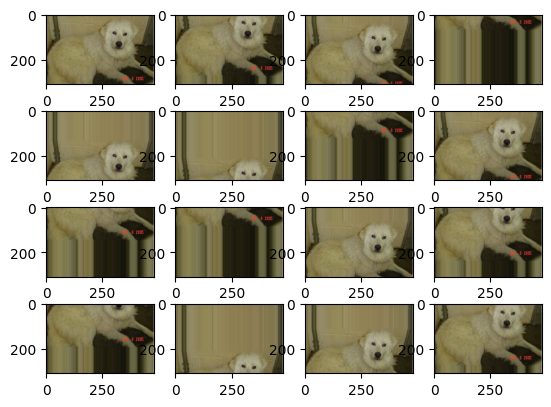

In [12]:
max_img_num = 16
imgs = []
for d in datagen.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [13]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import glob

import time
import os

# 可視化ライブラリ
import matplotlib.pyplot as plt
#import matplotlib as plt
from PIL import Image

%matplotlib inline

"""
# 深層学習ライブラリ：keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import tensorflow as tf

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Conv2D, Flatten, Dense,Dropout, GlobalAveragePooling2D,Input

from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop
from keras.callbacks import LearningRateScheduler
"""




'\n# 深層学習ライブラリ：keras\nimport keras\nfrom keras.datasets import mnist\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, InputLayer\nfrom keras.optimizers import RMSprop\nimport tensorflow as tf\n\nfrom keras.utils import np_utils\nfrom keras.models import Sequential\nfrom keras.layers.convolutional import MaxPooling2D\nfrom keras.layers import Activation, Conv2D, Flatten, Dense,Dropout, GlobalAveragePooling2D,Input\n\nfrom sklearn.model_selection import train_test_split\nfrom keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop\nfrom keras.callbacks import LearningRateScheduler\n'

犬と猫データセットの読み込み

In [14]:
from keras.preprocessing.image import ImageDataGenerator

N_CATEGORIES  = 3  #入力画像のChannel数：RGB 3channel
IMAGE_SIZE = 224   #画像サイズ：224x224をリサイズ
BATCH_SIZE = 16    #

# 学習用データの前処理：輝度値の正規化（0, 1)
# 水増し手法　1)シアー強度: 0.2  2)拡大縮小範囲: 0.2  3)水平方向反転 4)画像を回転させる角度
train_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   rotation_range=10)

# テスト用データの前処理：輝度値の正規化（0, 1)、水増しが無し
test_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
)

###学習用データの読み込む
train_generator = train_datagen.flow_from_directory(
   '/content/DogCat/train',
   target_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='categorical',
   shuffle=True
)


###学習用データの読み込む
test_generator = test_datagen.flow_from_directory(
   '/content/DogCat/val',
   target_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='categorical',
   shuffle=True
)



Found 2200 images belonging to 2 classes.
Found 544 images belonging to 2 classes.


In [15]:
len(train_generator)
#len(test_generator.ClassName)
print(len(train_generator)*16)
print(len(test_generator)*16)


2208
544


Modelの定義、学習済みネットワークVGG16を用いて転移学習、ファインチューニング

In [22]:
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
#

Class_Num=2
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# VGG16
from keras.applications.vgg16 import VGG16   #モデルサイズ：528MB
Net = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor)


"""
# VGG19
from keras.applications.vgg19 import VGG19 #モデルサイズ：549MB
Net = VGG19(weights='imagenet', include_top=False,input_tensor=input_tensor)  # VGG19
"""
from keras.applications.resnet50 import ResNet50
Net = ResNet50(include_top=False, weights='imagenet',input_tensor=input_tensor)

x = Net.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(Class_Num, activation='softmax')(x)
model = Model(inputs=Net.input, outputs=predictions)

"""
top_model = Sequential()
top_model.add(GlobalAveragePooling2D())
top_model.add(Dense(Class_Num, activation='softmax'))

model = Model(Net.input, top_model(Net.output))

"""

###転移学習
"""
for layer in Net.layers:
   layer.trainable = False
"""
###ファインチューニング
"""
for layer in Net.layers:
   layer.trainable = True
"""
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()



94765736/94765736 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                       

In [17]:
len(train_generator)
print(test_generator)
print(len(train_generator)*16)
print(len(test_generator)*16)

2208
544


In [ ]:
hist = model.fit(train_generator,
   steps_per_epoch=len(train_generator),
   epochs=20,
   verbose=1,
   validation_data=test_generator,
   validation_steps=len(test_generator),
   )

#model.save('/content/drive/MyDrive/Data/DogCat/models/DogCat_VGG16_FT50.hdf5')

Epoch 1/20
 88/138 [==================>...........] - ETA: 14s - loss: 0.1999 - accuracy: 0.9357

In [24]:
#テスト用データ (x_test と y_test )を与えて、正解率を求める
score = model.evaluate(test_generator, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

34/34 [==============================] - 3s 92ms/step - loss: 0.8744 - accuracy: 0.4614

Test loss: 0.8744387626647949
Test accuracy: 0.46139705181121826


model.fit() の戻り値 history から、学習経過を可視化する

loss : 損失、小さい数字ほど正しい結果を出せるように学習できたことを表し、逆に値が大きい場合は正しい結果を出せていないことを表す

val_loss : テスト用データに対して、どれだけ正しい結果を出せたのかということを表します。


In [20]:
print(hist)

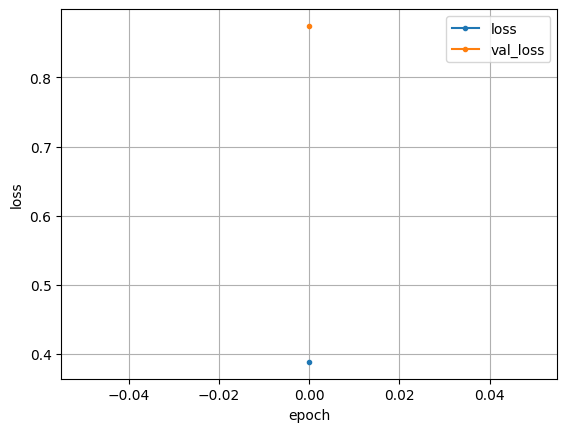

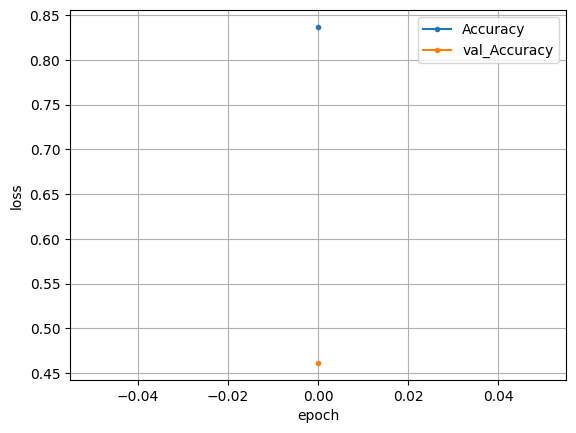

In [25]:
import matplotlib.pyplot as plt
loss     = hist.history['loss']
val_loss = hist.history['val_loss']
accu     = hist.history['accuracy']
val_accu = hist.history['val_accuracy']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(range(nb_epoch), accu,     marker='.', label='Accuracy')
plt.plot(range(nb_epoch), val_accu, marker='.', label='val_Accuracy')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

モデルの確認

In [ ]:
model.summary()